**LOADING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

**LOADING STOCK DATA**

In [2]:
data = yf.download("GOOGL", start="2015-01-01", end="2023-01-01")
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


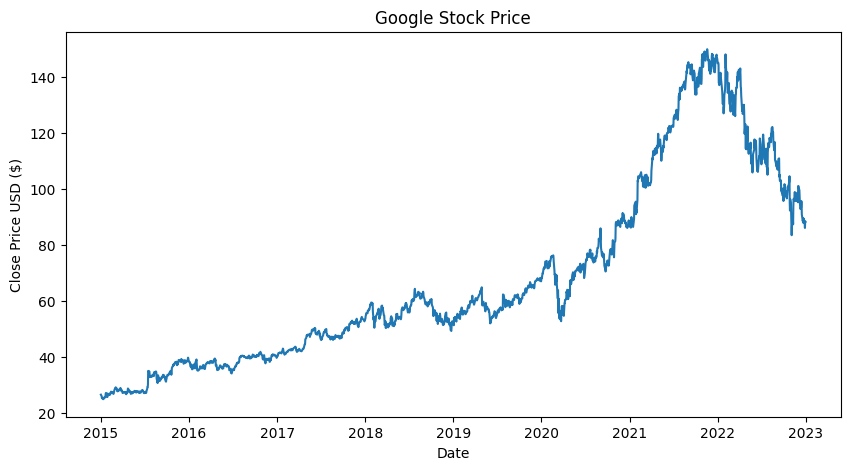

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title("Google Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.show()

**PRE PROCESSING THE DATA**

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

**CREATING TRAINING AND TESTING DATA SETS**

In [5]:
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]


In [6]:
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

**BUILDING LSTM MODEL**

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1551/1551 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - loss: 0.0019


In [10]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [11]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)



13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step


<ipython-input-12-76af1aa26f82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


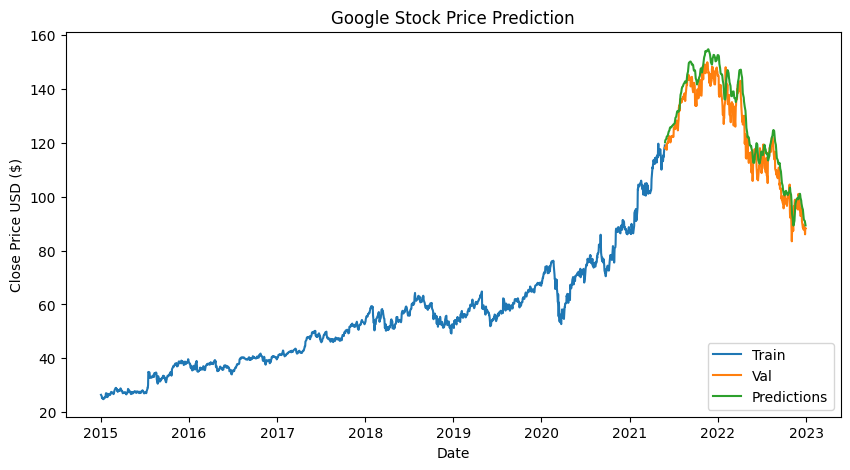

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(10, 5))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title("Google Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()